In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import decomposition
from tqdm.notebook import tqdm 
from sklearn.preprocessing import StandardScaler, RobustScaler , MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import collections as cl

In [4]:
customers=pd.read_csv('customers_true.csv')
customers

,CUSTOMER_ID,2018_weekly_expence,2018_weekly_purchasings,2019_weekly_expence,2019_weekly_purchasings,2018_monthly_expence,2018_monthly_purchasings,2019_monthly_expence,2019_monthly_purchasings,avg_expence,...,Spring,Summer,Winter,Acquired,Spent,FIDELTY,cheap,expensive,normal,very expensive
0,AA00312188,12.009259,0.370370,10.169811,0.264151,46.321429,1.428571,44.916667,1.166667,36.702000,...,0.203525,0.134323,0.313265,248.333333,2920.0,0.800000,0.278846,0.115385,0.548077,0.057692
1,AA00312390,5.148148,0.370370,6.018868,0.339623,19.857143,1.428571,26.583333,1.500000,15.730000,...,0.344357,0.215831,0.180408,112.708333,560.0,0.966667,0.396552,0.327586,0.206897,0.068966
2,AA00325975,15.451852,0.407407,16.885849,0.415094,59.600000,1.571429,74.579167,1.833333,39.897143,...,0.221968,0.274261,0.248897,305.909091,6602.5,0.971429,0.336585,0.160976,0.463415,0.039024
3,AA00336843,3.555556,0.222222,6.541509,0.283019,13.714286,0.857143,28.891667,1.250000,21.643182,...,0.384050,0.202481,0.282088,133.333333,3465.0,0.454545,0.217391,0.101449,0.623188,0.057971
4,AA00339761,9.168519,0.296296,4.017925,0.150943,35.364286,1.142857,17.745833,0.666667,29.414706,...,0.352665,0.281052,0.240197,200.625000,2015.0,1.000000,0.050847,0.389831,0.423729,0.135593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25722,YZ04556116,0.000000,0.000000,0.886792,0.037736,0.000000,0.000000,3.916667,0.166667,23.500000,...,0.000000,1.000000,0.000000,295.000000,0.0,0.500000,0.222222,0.111111,0.111111,0.555556
25723,YZ04586406,0.000000,0.000000,14.323585,0.245283,0.000000,0.000000,63.262500,1.083333,54.246667,...,0.000000,0.228479,0.215109,388.000000,0.0,0.600000,0.353659,0.182927,0.451220,0.012195
25724,YZ04658257,0.000000,0.000000,17.783019,0.169811,0.000000,0.000000,78.541667,0.750000,89.163636,...,0.000000,0.124881,0.228011,618.888889,5040.0,1.000000,0.224138,0.224138,0.482759,0.068966
25725,YZ04743693,0.000000,0.000000,1.591509,0.075472,0.000000,0.000000,7.029167,0.333333,17.620000,...,0.000000,0.000000,0.000000,197.000000,0.0,1.000000,0.285714,0.214286,0.285714,0.214286


In [5]:
customers.drop(['2018_weekly_expence','2018_weekly_purchasings',
               '2018_monthly_expence','2018_monthly_purchasings'],
              axis=1,inplace=True)

In [6]:
customers.columns

Index(['CUSTOMER_ID', '2019_weekly_expence', '2019_weekly_purchasings',
       '2019_monthly_expence', '2019_monthly_purchasings', 'avg_expence',
       'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD', 'GIFT CARD', 'afternoon',
       'launch', 'morning', 'night', 'feriale', 'weekend', 'MEMBER_GET_MEMBER',
       'PHONE', 'STORE', 'WEB', 'OTHER_0', 'OTHER_FROZEN', 'SAUCE',
       'READY-MADE', 'POULTRY', 'BEEF_PORK', 'FISH', 'FRIES', 'VEGETABLES',
       'FRUIT', 'ACCESSORIES', 'DRINKS', 'GADGETS', 'OTHER', 'OTHER_MISSING',
       'Fall', 'Spring', 'Summer', 'Winter', 'Acquired', 'Spent', 'FIDELTY',
       'cheap', 'expensive', 'normal', 'very expensive'],
      dtype='object')

In [7]:
customers_cat = customers[['Fall', 'Spring', 'Summer', 'Winter',
                           'cheap', 'expensive', 'normal', 'very expensive',
                           'CASH', 'CHECK', 'CREDIT CARD', 'DEBIT CARD']]

In [8]:
to_scale = customers_cat

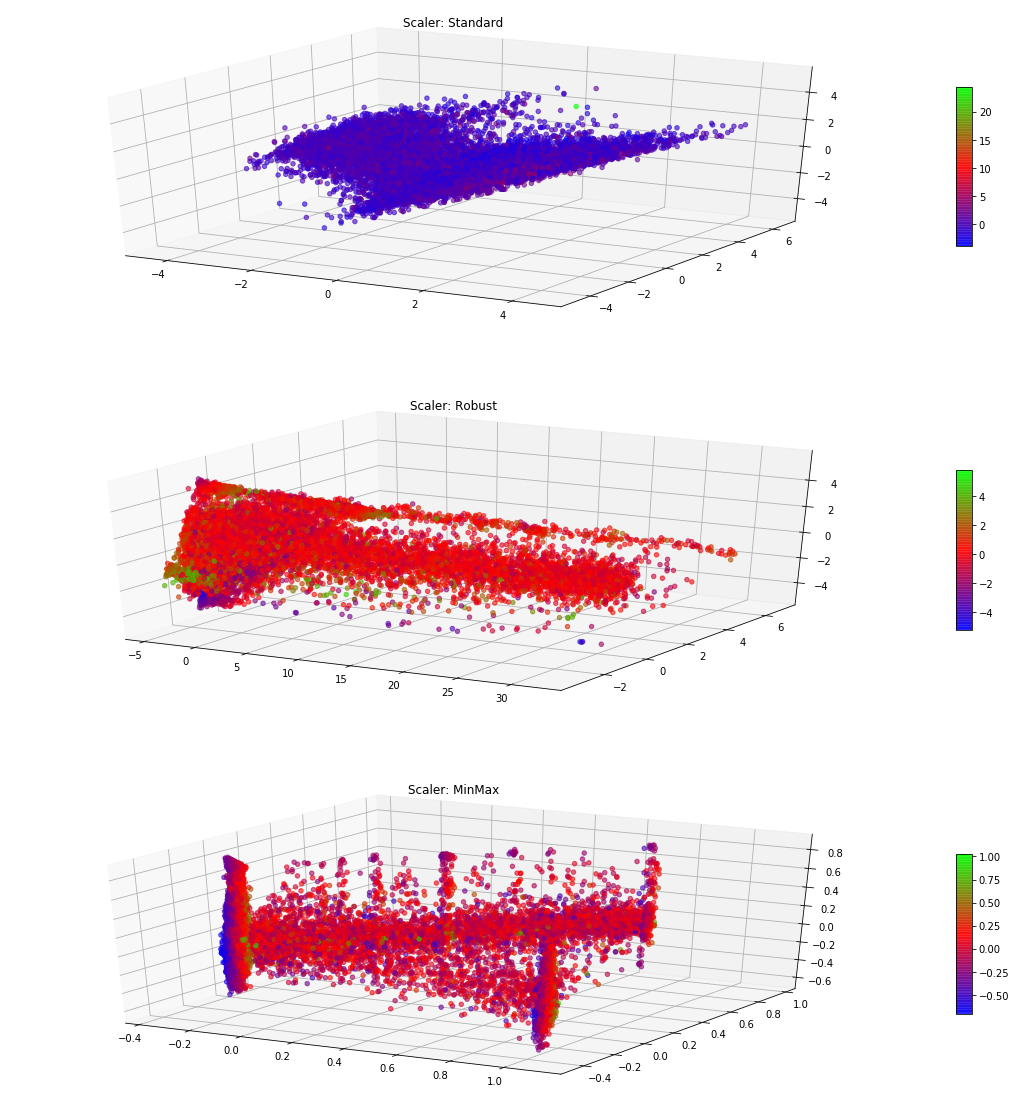

In [9]:
Scalers ={'Standard':StandardScaler(),'Robust':RobustScaler(),
         'MinMax':MinMaxScaler()}
fig = plt.figure(figsize=(20,20))
i = 1
for scaler_name, scaler in Scalers.items():
    scaler.fit(to_scale)
    customers_scaled = scaler.transform(to_scale)
    pca = decomposition.PCA(n_components=10)
    pca.fit(customers_scaled)
    pca_components = pd.DataFrame(pca.transform(customers_scaled))
    
    ax = fig.add_subplot(3, 1, i, projection='3d')
    view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components[3],cmap="brg")
    ax.set_title('Scaler: {}'.format(scaler_name))
    fig.colorbar(view, shrink=0.5, aspect=10)
    
    i+=1
plt.show() 

In [10]:
#scaler = StandardScaler()
#scaler = RobustScaler()
scaler = MinMaxScaler()
scaler.fit(to_scale)
customers_scaled = scaler.transform(to_scale)
pca = decomposition.PCA(n_components=10)
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
explained_variance=0
i=1
for e_v in pca.explained_variance_ratio_:
    explained_variance+=e_v
    print('component',i,'\t',explained_variance)
    i+=1

component 1 	 0.46324306079802896
component 2 	 0.6443804972647312
component 3 	 0.7395659845065263
component 4 	 0.812636690522214
component 5 	 0.8740361168039904
component 6 	 0.9296034795312564
component 7 	 0.9754624086613928
component 8 	 0.9944478463489969
component 9 	 0.9995760711884317
component 10 	 0.9999284033036787


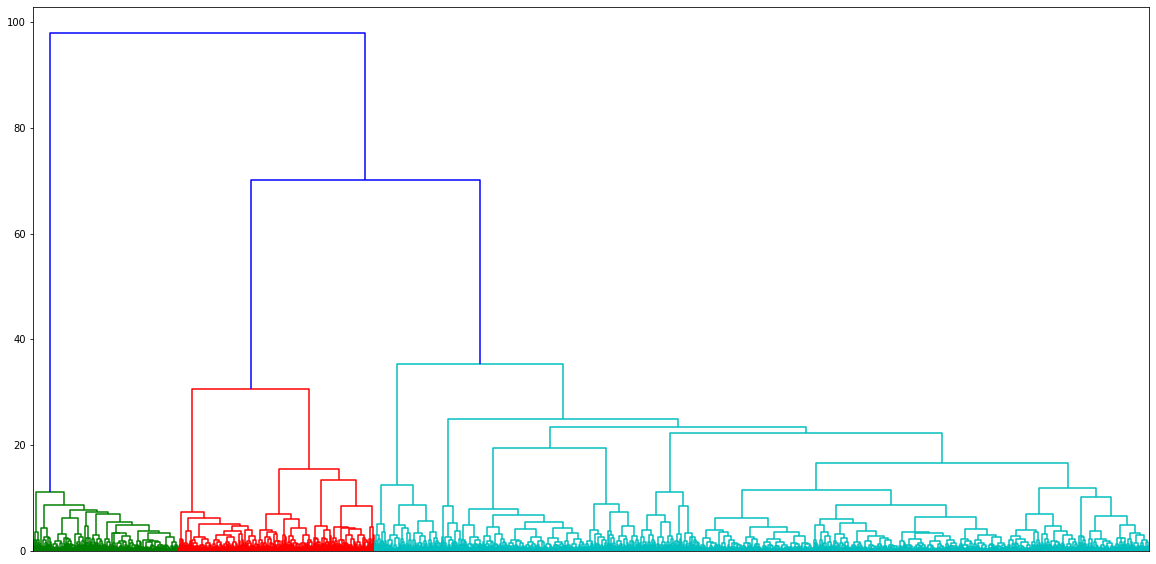

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
Z = linkage(pca_components,method='ward', metric='euclidean')
dendrogram(Z, leaf_rotation=90,ax=ax,no_labels=True);

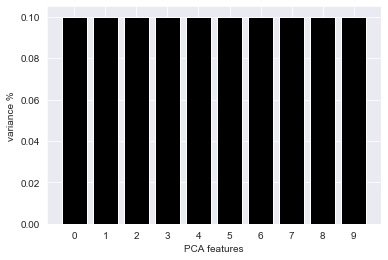

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(pca_components)
# Create a PCA instance: pca
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

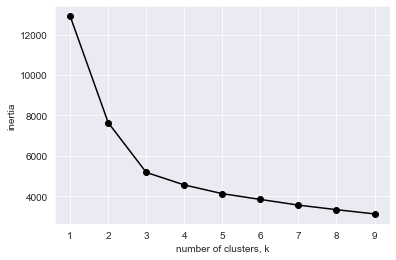

In [21]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_components)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## K-means

evaluate for seed: 42



evaluate for seed: 1


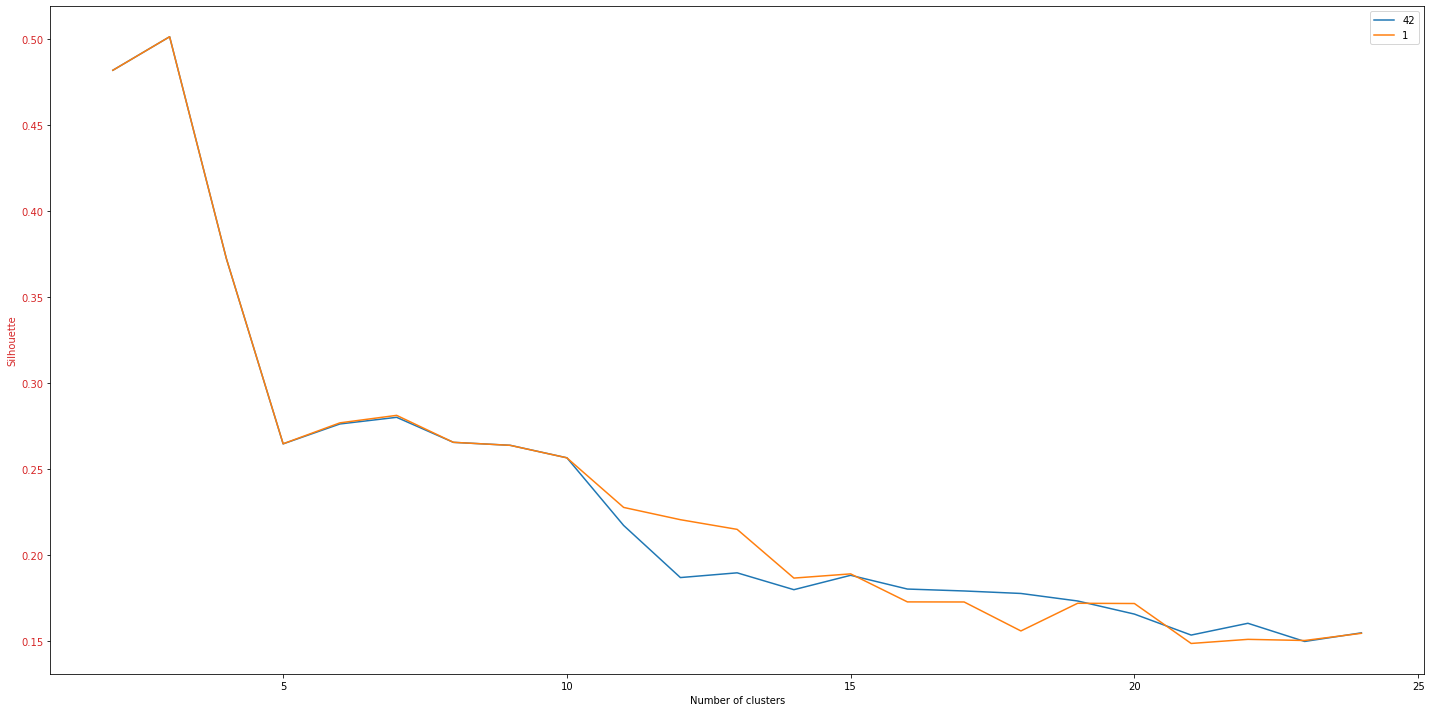

In [12]:
seeds = [42,1]
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Number of clusters')
color = 'tab:red'
ax1.set_ylabel('Silhouette', color=color)
 
for seed in seeds:
    print('evaluate for seed:',seed)
    distortions = []
    silhouette_scores = []
    with tqdm(total=len(range(2,25))) as pbar:
        for k in range(2,25):
            k_estimator = KMeans(n_clusters=k, random_state=seed)
            fitted = k_estimator.fit_predict(pca_components)
            distortions.append(k_estimator.inertia_)
            silhouette_scores.append(silhouette_score(pca_components,fitted))
            pbar.update(1)


    ax1.plot(range(2,25), silhouette_scores, label = seed)
    ax1.tick_params(axis='y', labelcolor=color)



fig.tight_layout()
plt.legend()
plt.show()

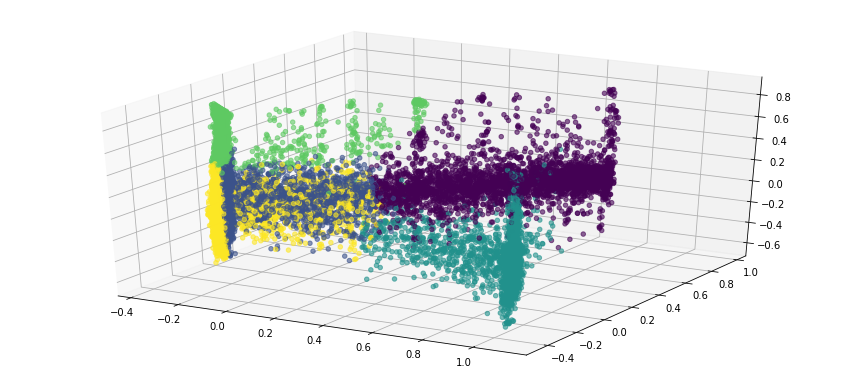

In [13]:
n_cluster = 5
k_estimator = KMeans(n_clusters=n_cluster, random_state=42)
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
fitted_3 = k_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = fitted_3
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],)


plt.show()

## DBSCAN

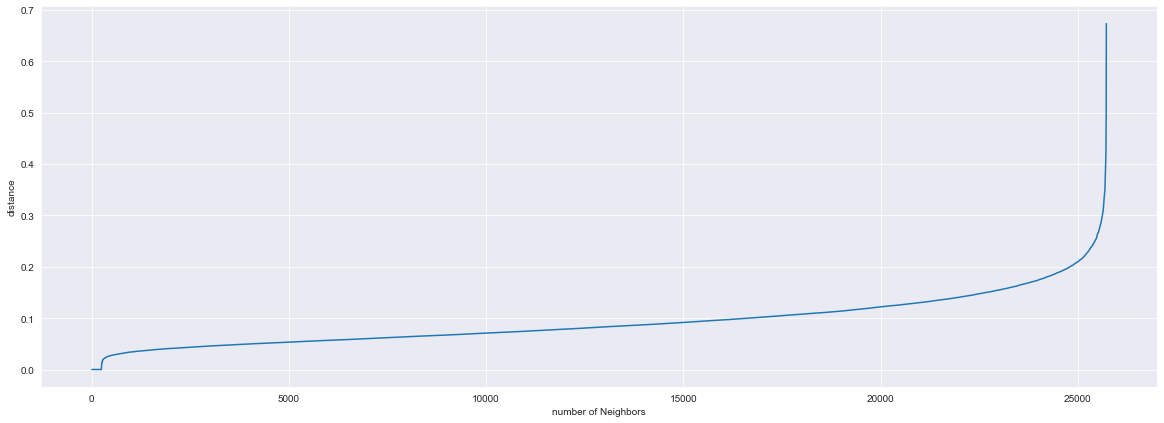

In [14]:
neigh = NearestNeighbors()
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
nbrs = neigh.fit(pca_components)
distances, indices = nbrs.kneighbors(pca_components)
fig=plt.figure(figsize=(20,7))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
sns.set_style('darkgrid')
plt.plot(distances);
plt.xlabel('number of Neighbors')
plt.ylabel('distance')

plt.show()

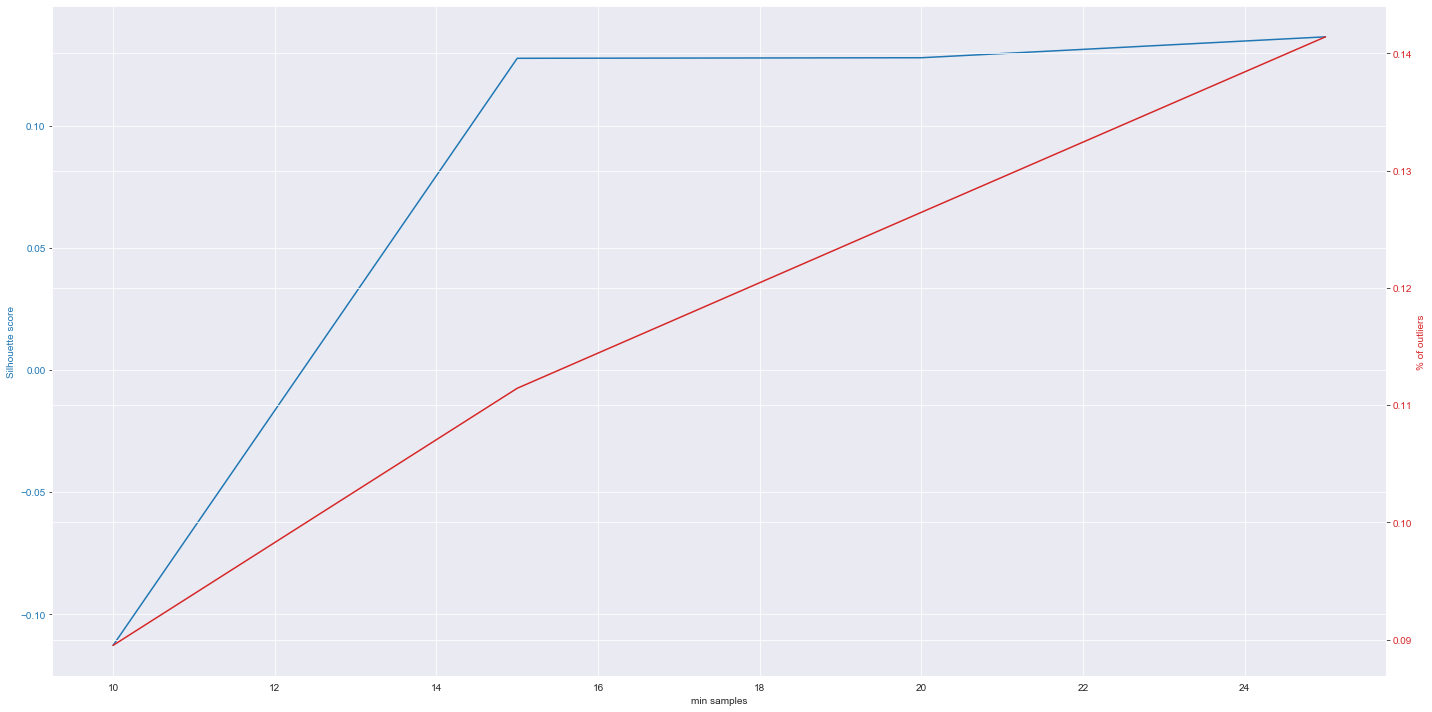

In [15]:
score = []
outliers = []
samples = np.arange(10,30, 5)
with tqdm(total=len(samples)) as pbar:
    for n in samples:
        dbs_estimator = DBSCAN(eps=0.2, min_samples=n)
        dbs_estimator.fit(pca_components)
        dbs_labels = dbs_estimator.labels_
        outliers_ = cl.Counter(dbs_labels)[-1]/(len(dbs_labels))
        score.append(silhouette_score(pca_components,dbs_labels))
        outliers.append(outliers_)
        
        pbar.update(1)

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('min samples')
ax1.set_ylabel('Silhouette score', color=color)
ax1.plot(samples,score, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('% of outliers', color=color)  
ax2.plot(samples,outliers, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

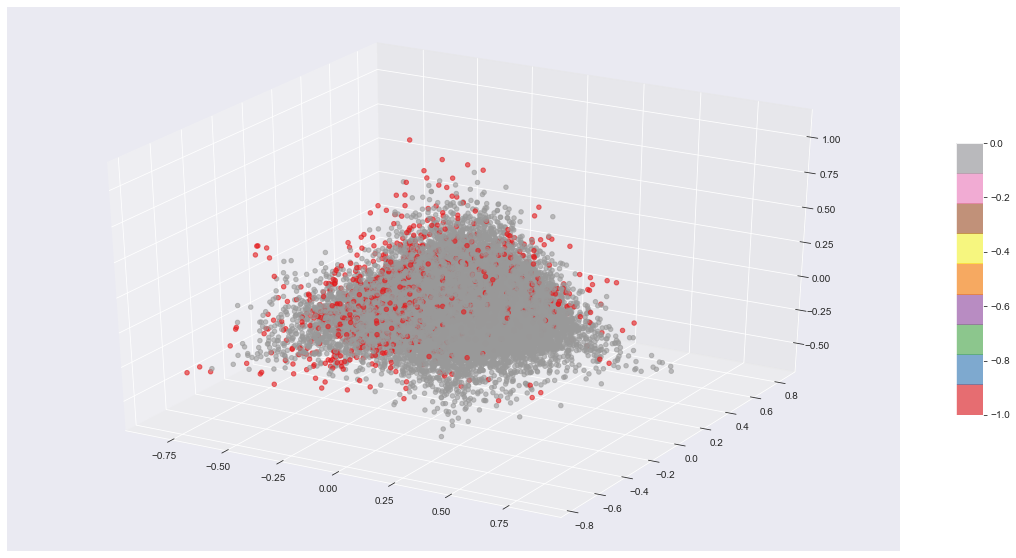

1 clusters founded, outliers in red


In [66]:
dbs_estimator = DBSCAN(eps = 0.2, min_samples=10)
pca.fit(customers_scaled)
pca_components = pca.transform(customers_scaled)
dbs_labels = dbs_estimator.fit_predict(pca_components)
pca_components = pd.DataFrame(pca_components)
pca_components['CLUSTER'] = dbs_labels
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
view = ax.scatter(pca_components[0],pca_components[1],pca_components[2],alpha=0.6,
          c=pca_components['CLUSTER'],cmap="Set1")
fig.colorbar(view, shrink=0.5, aspect=10)

plt.show()
print('{} clusters founded, outliers in red'.format(len(np.unique(dbs_labels))-1))

## Inspect for 5 cluster, founded by k-means

In [17]:
pca_components['CLUSTER'] = fitted_3

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [18]:
customers_cat['CLUSTER'] = customers_cat.index.map(pca_components.set_index(pca_components.index)['CLUSTER'])

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.barplot(customers_cat.CLUSTER.value_counts().index,
           customers_cat.CLUSTER.value_counts().values);

In [67]:
to_view

Index(['OTHER_0', 'OTHER_FROZEN', 'SAUCE', 'READY-MADE', 'POULTRY',
       'BEEF_PORK', 'FISH', 'FRIES', 'VEGETABLES', 'FRUIT', 'ACCESSORIES',
       'DRINKS', 'GADGETS', 'OTHER', 'OTHER_MISSING', 'cheap', 'expensive',
       'normal', 'very expensive'],
      dtype='object')

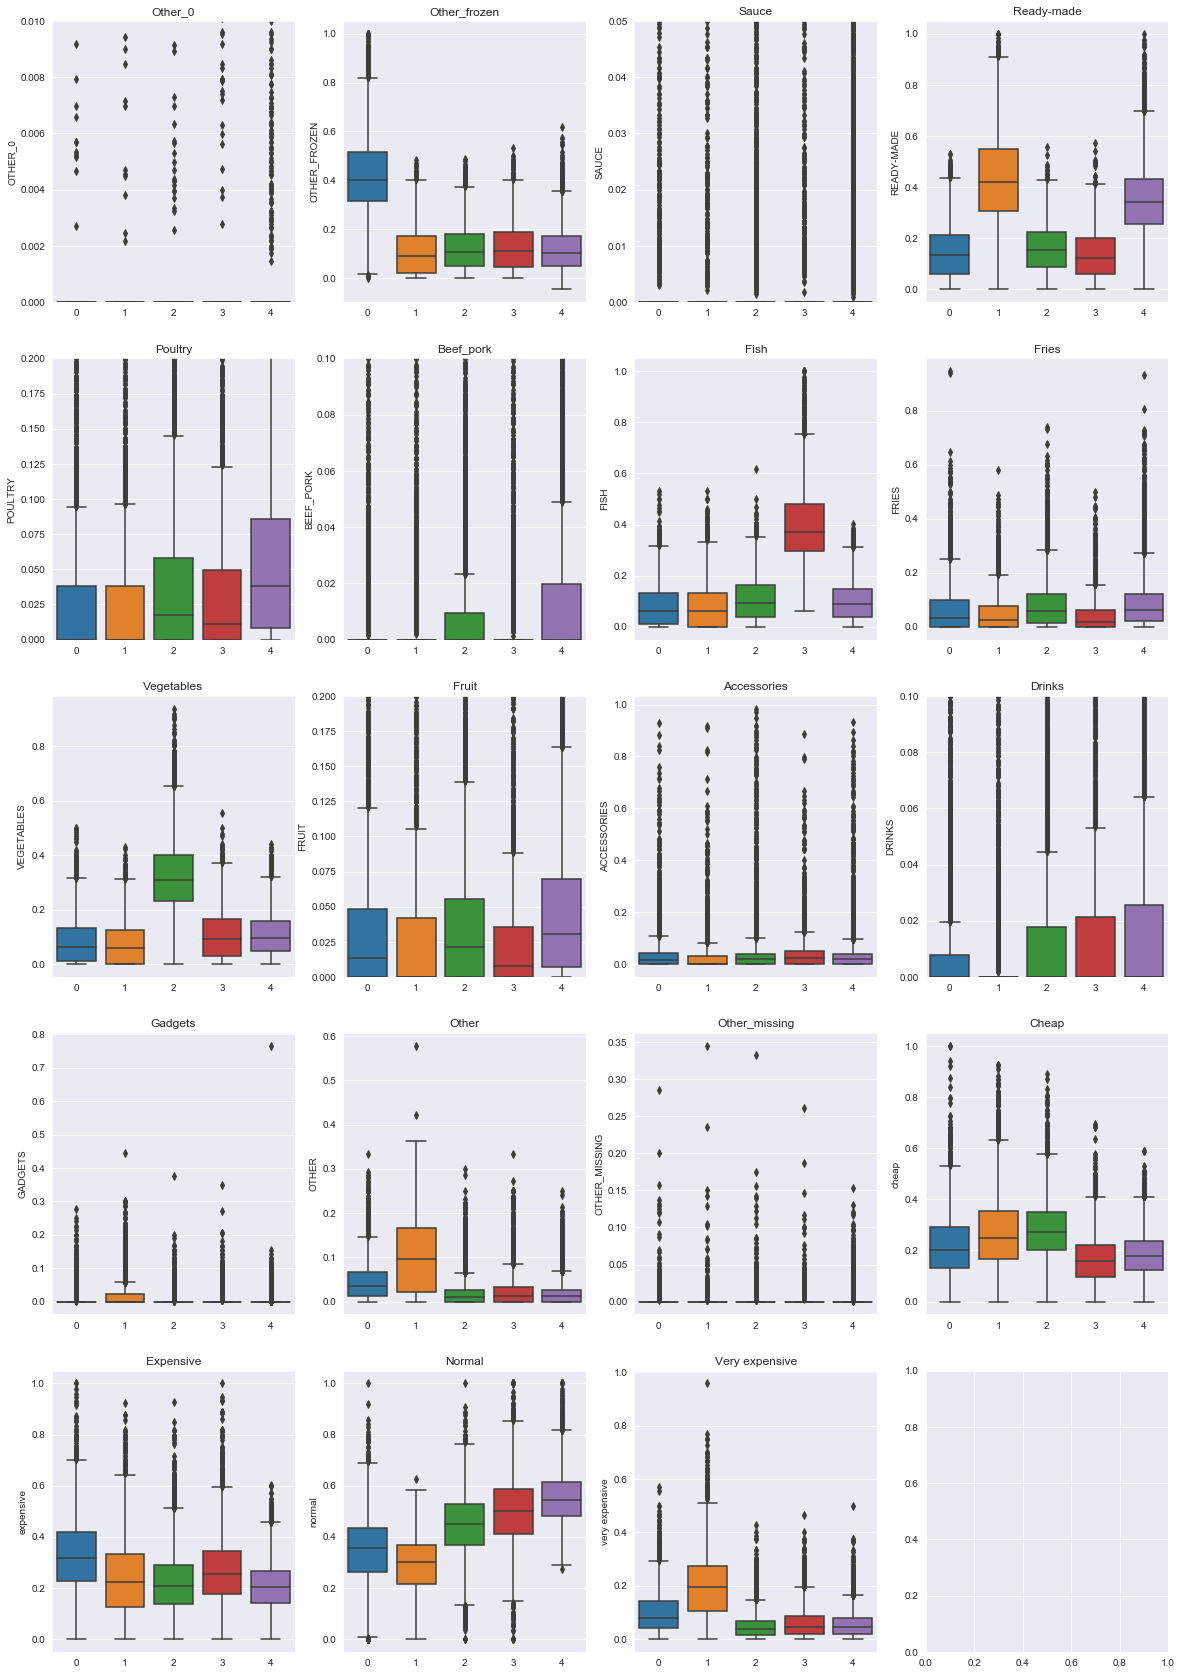

In [71]:
fig, ax = plt.subplots(figsize=(20,30), nrows=5, ncols=4)
counter = 0
to_view = customers_cat.drop('CLUSTER',axis=1).columns
for col in to_view:

    j = counter%4; i = counter//4;

    view_week_expence = customers_cat[['CLUSTER',col]]
    view_week_expence.sort_values('CLUSTER')
    sns.boxplot(x='CLUSTER',y=col,data = view_week_expence,ax=ax[i,j])
    ax[i,j].set_xlabel('')
    ax[i,j].set_title(col.capitalize())
    
        
    if (col.capitalize() == 'Other_0'):
        ax[i,j].set_ylim(0,0.01)
    if (col.capitalize() == 'Sauce'):
        ax[i,j].set_ylim(0,0.05)
    if (col.capitalize() == 'Poultry'):
        ax[i,j].set_ylim(0,0.2)
    if (col.capitalize() == 'Beef_pork'):
        ax[i,j].set_ylim(0,0.1)
    if (col.capitalize() == 'Fruit'):
        ax[i,j].set_ylim(0,0.2)
    if (col.capitalize() == 'Drinks'):
        ax[i,j].set_ylim(0,0.1)
    if (col.capitalize() == 'Acquired'):
        ax[i,j].set_ylim(0,1000)
    if (col.capitalize() == 'Spent'):
        ax[i,j].set_ylim(0,10000)
        
    counter+=1